In [ ]:
!pip install wfdb

In [ ]:
!wget -r -N -c -np https://physionet.org/files/ptb-xl/1.0.1/

A saída de streaming foi truncada nas últimas 5000 linhas.
Length: 120000 (117K) [application/octet-stream]
Saving to: ‘physionet.org/files/ptb-xl/1.0.1/records500/21000/21588_hr.dat’

physionet.org/files 100%[===================>] 117.19K  --.-KB/s    in 0.003s  

2022-04-28 09:02:38 (36.7 MB/s) - ‘physionet.org/files/ptb-xl/1.0.1/records500/21000/21588_hr.dat’ saved [120000/120000]

--2022-04-28 09:02:38--  https://physionet.org/files/ptb-xl/1.0.1/records500/21000/21588_hr.hea
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 611 [text/plain]
Saving to: ‘physionet.org/files/ptb-xl/1.0.1/records500/21000/21588_hr.hea’

physionet.org/files 100%[===================>]     611  --.-KB/s    in 0s      

2022-04-28 09:02:38 (81.7 MB/s) - ‘physionet.org/files/ptb-xl/1.0.1/records500/21000/21588_hr.hea’ saved [611/611]

--2022-04-28 09:02:38--  https://physionet.org/files/ptb-xl/1.0.1/records500/21000/21589_hr.dat
Reusing existing connect

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
cd '/content/drive/My Drive/DSL'

/content/drive/My Drive/DSL


In [ ]:
import pandas as pd
import numpy as np
import wfdb
import ast

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

path = '/content/drive/My Drive/DSL/physionet.org/files/ptb-xl/1.0.1/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

In [ ]:
X_train.shape

(19634, 1000, 12)

In [ ]:
y_train.shape

(19634,)

In [ ]:
X_test.shape

(2203, 1000, 12)

In [ ]:
y_test.shape

(2203,)

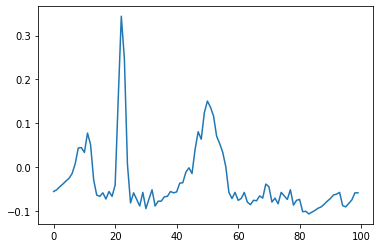

In [31]:
import matplotlib.pyplot as plt
plt.plot(X_train[0][:100,1])

In [ ]:
for elm in y_train:
  print(elm)

A saída de streaming foi truncada nas últimas 5000 linhas.
['STTC']
['NORM']
['NORM']
['NORM']
['NORM']
['CD']
['HYP', 'STTC']
['NORM']
['NORM']
['NORM']
['NORM']
['NORM']
['CD']
['NORM']
['NORM']
['NORM']
['HYP', 'MI', 'STTC', 'CD']
['CD']
['MI', 'CD']
['MI', 'CD']
['STTC']
['MI']
['MI', 'CD']
['STTC', 'CD']
['MI', 'CD']
['MI', 'STTC']
['NORM']
['NORM']
['MI', 'STTC']
['HYP', 'STTC']
['NORM']
['NORM']
['MI']
['MI']
['NORM']
['HYP', 'MI']
['NORM']
['NORM']
['MI', 'STTC']
['HYP', 'CD', 'STTC']
['STTC']
['CD']
['NORM']
['CD']
[]
['CD']
['NORM']
['NORM']
['NORM']
['CD']
['NORM']
['NORM']
['NORM']
['MI', 'STTC']
['HYP']
['NORM']
['NORM']
['HYP', 'MI', 'STTC']
[]
['HYP', 'STTC']
['HYP', 'MI', 'STTC']
['MI', 'STTC']
['MI', 'CD']
['MI', 'CD']
['MI', 'CD']
['STTC']
['NORM']
['NORM']
['CD']
['HYP']
['HYP', 'MI', 'STTC']
['NORM']
['NORM']
['NORM']
['NORM', 'CD']
['HYP', 'CD']
['CD']
['NORM']
['HYP', 'MI', 'STTC']
['MI', 'STTC']
['NORM']
['MI', 'CD']
['HYP']
['MI']
['STTC']
['NORM']
['CD', 'STTC'

In [ ]:
y_train

ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: diagnostic_superclass, Length: 19634, dtype: object

In [ ]:
cd '/content/drive/My Drive/DSL'

/content/drive/My Drive/DSL


In [ ]:
import pickle
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()